In [1]:
import numpy as np # linear algebra -for numeric computations
import pandas as pd # data processing -to store data as dataframes 
import matplotlib.pyplot as plt # data visualization 
%matplotlib inline
import seaborn as sns # data visualization 

# **Importing ProsperLoan Dataset**

In [2]:
data = pd.read_csv('../input/prosper-loan/prosperLoanData.csv')
data.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


**Structure Investigation**

In [3]:
data.columns # names/labels of columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
data.shape # size of dataset

(113937, 81)

In [5]:
pd.value_counts(data.dtypes)

float64    50
object     17
int64      11
bool        3
dtype: int64

In [6]:
# Display non-numerical features
data.select_dtypes(exclude="number").head()

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,IncomeVerifiable,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,True,True,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",True,E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,Current,NaN,A,CO,Professional,Employed,False,False,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",True,9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,NaN,GA,Other,Not available,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,True,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,Current,NaN,A,GA,Skilled Labor,Employed,True,False,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",True,A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,Current,NaN,D,MN,Executive,Employed,True,False,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",True,A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C


In [7]:
# parsing Dates
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'])
data['ClosedDate'] = pd.to_datetime(data['ClosedDate'])
data['DateCreditPulled'] = pd.to_datetime(data['DateCreditPulled'])
data['FirstRecordedCreditLine'] = pd.to_datetime(data['FirstRecordedCreditLine'])
data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'])


In [8]:
data.info() # datatypes of all cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [9]:
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [10]:
# investigate how many unique values each non-numerical feature has and 
# with which frequency the most prominent value is present.
data.describe(exclude='number')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,IncomeVerifiable,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
count,113937,113937,28953,113937,55089,84853,108422,110349,111682,113937,113937,13341,113937,113240,113937,113937,113937,113937,113937,113937
unique,113066,113064,8,12,2802,7,51,67,8,2,2,706,112992,11585,8,2,113066,1873,33,90831
top,17A93590655669644DB4C06,2013-10-02 17:20:16.550000,C,Current,2014-03-04 00:00:00,C,CA,Other,Employed,True,False,783C3371218786870A73D20,2013-12-23 09:38:12,1993-12-01 00:00:00,"$25,000-49,999",True,CB1B37030986463208432A1,2014-01-22 00:00:00,Q4 2013,63CA34120866140639431C9
freq,6,6,5649,56576,105,18345,14717,28617,67322,57478,101218,1140,6,185,32192,105268,6,491,14450,9
first,NaN,2005-11-09 20:44:28.847000,NaN,NaN,2005-11-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-11-09 00:30:04.487000,1947-08-24 00:00:00,NaN,NaN,NaN,2005-11-15 00:00:00,NaN,NaN
last,NaN,2014-03-10 12:20:53.760000,NaN,NaN,2014-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-10 12:20:56,2012-12-22 00:00:00,NaN,NaN,NaN,2014-03-12 00:00:00,NaN,NaN


# **Quality Investigation**

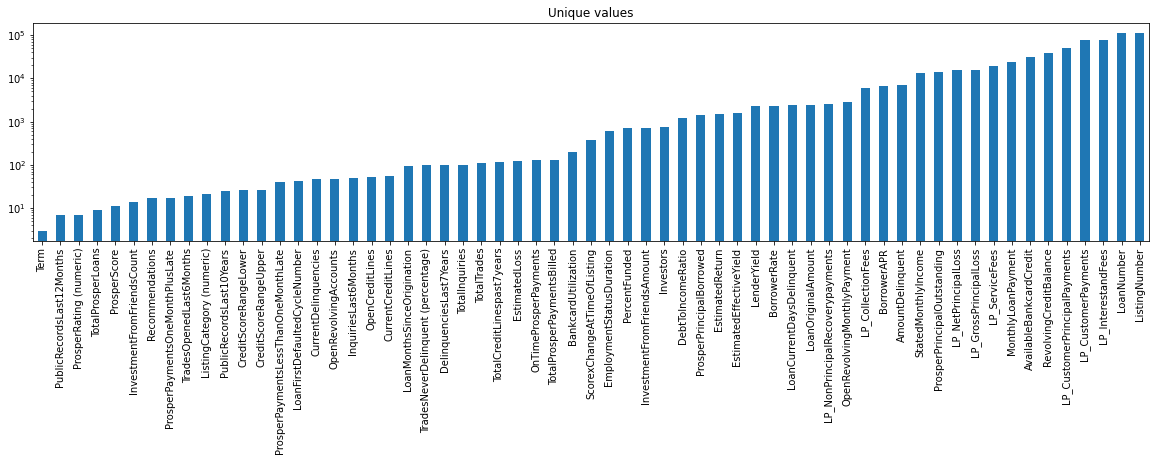

In [11]:
# For each numerical feature, compute number of unique entries
unique_values = data.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis
unique_values.plot.bar(logy=True, figsize=(20, 4), title="Unique values");

**Quality Investigation**

In [12]:
# Check number of duplicates
n_duplicates = data.duplicated().sum()
print(f"There are {n_duplicates} duplicates in this dataset.")

There are 0 duplicates in this dataset.


In [13]:
data.isna().sum() # data preprocessing - finding out NAN values

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

<AxesSubplot:>

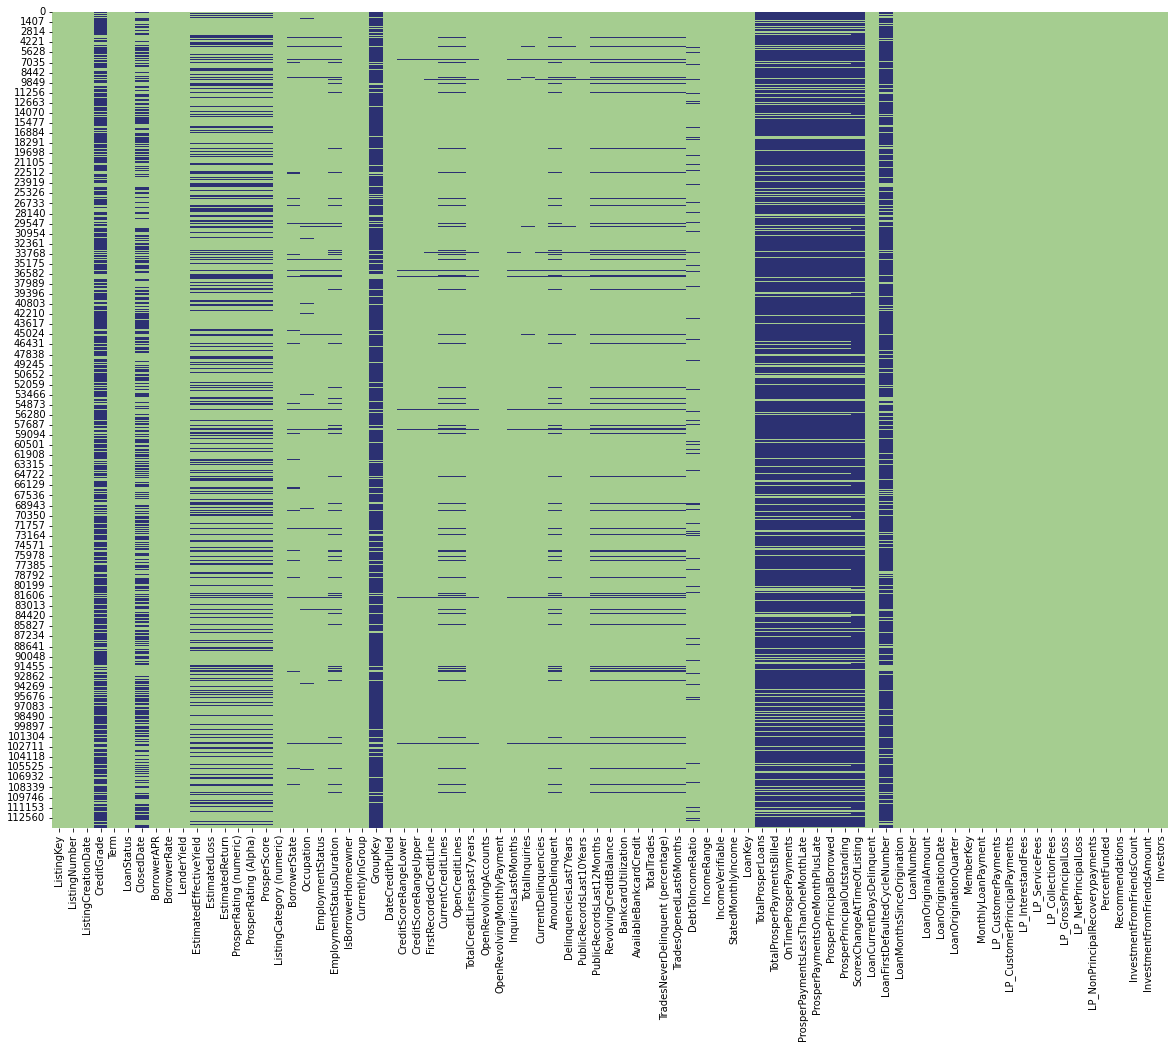

In [14]:
# 
plt.figure(figsize=(20,15))
sns.heatmap(data.isnull(),cbar=False,cmap='crest')

*Percentage of missing values in every feature*

([<matplotlib.patches.Wedge at 0x7f49a8684190>,
 [Text(-0.4926220739281703, 0.9835260506355226, 'missing values'),
  Text(0.5374057983750692, -1.0729375600997733, 'non missing values')],
 [Text(-0.2687029494153656, 0.5364687548921031, '14.8%'),
  Text(0.3134867157187904, -0.6258802433915344, '85.2%')])

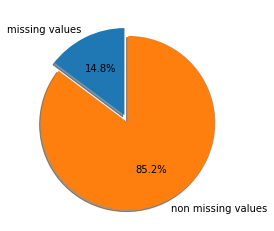

In [15]:
# calculating and visualization percentage of missing values in the dataset
missing = data.isnull().sum().sum()
not_missing = data.notnull().sum().sum()
plt.pie(np.array([missing, not_missing]), labels = ['missing values', 'non missing values'],
        autopct='%1.1f%%',explode=[0,0.1], shadow=True, startangle=90)

In [16]:
data.isna().mean().sort_values()

ListingKey                             0.000000
InvestmentFromFriendsAmount            0.000000
IncomeRange                            0.000000
IncomeVerifiable                       0.000000
StatedMonthlyIncome                    0.000000
                                         ...   
ProsperPaymentsOneMonthPlusLate        0.806165
ProsperPaymentsLessThanOneMonthLate    0.806165
ScorexChangeAtTimeOfListing            0.833873
LoanFirstDefaultedCycleNumber          0.851216
GroupKey                               0.882909
Length: 81, dtype: float64

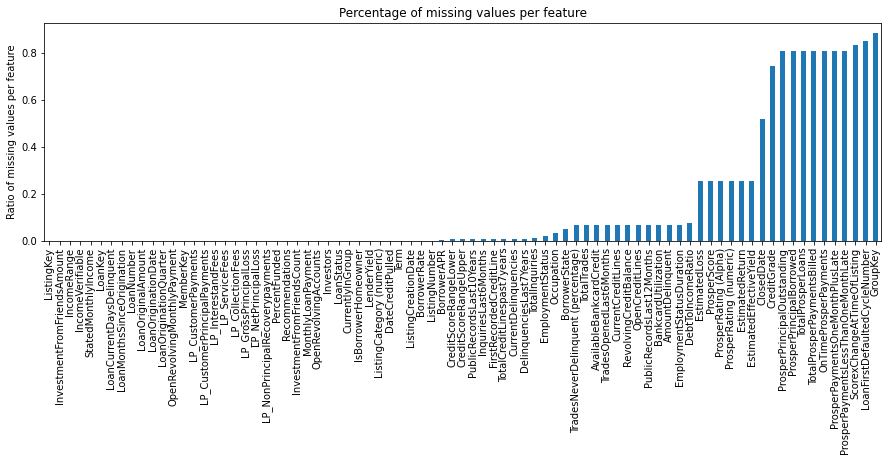

In [17]:
data.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

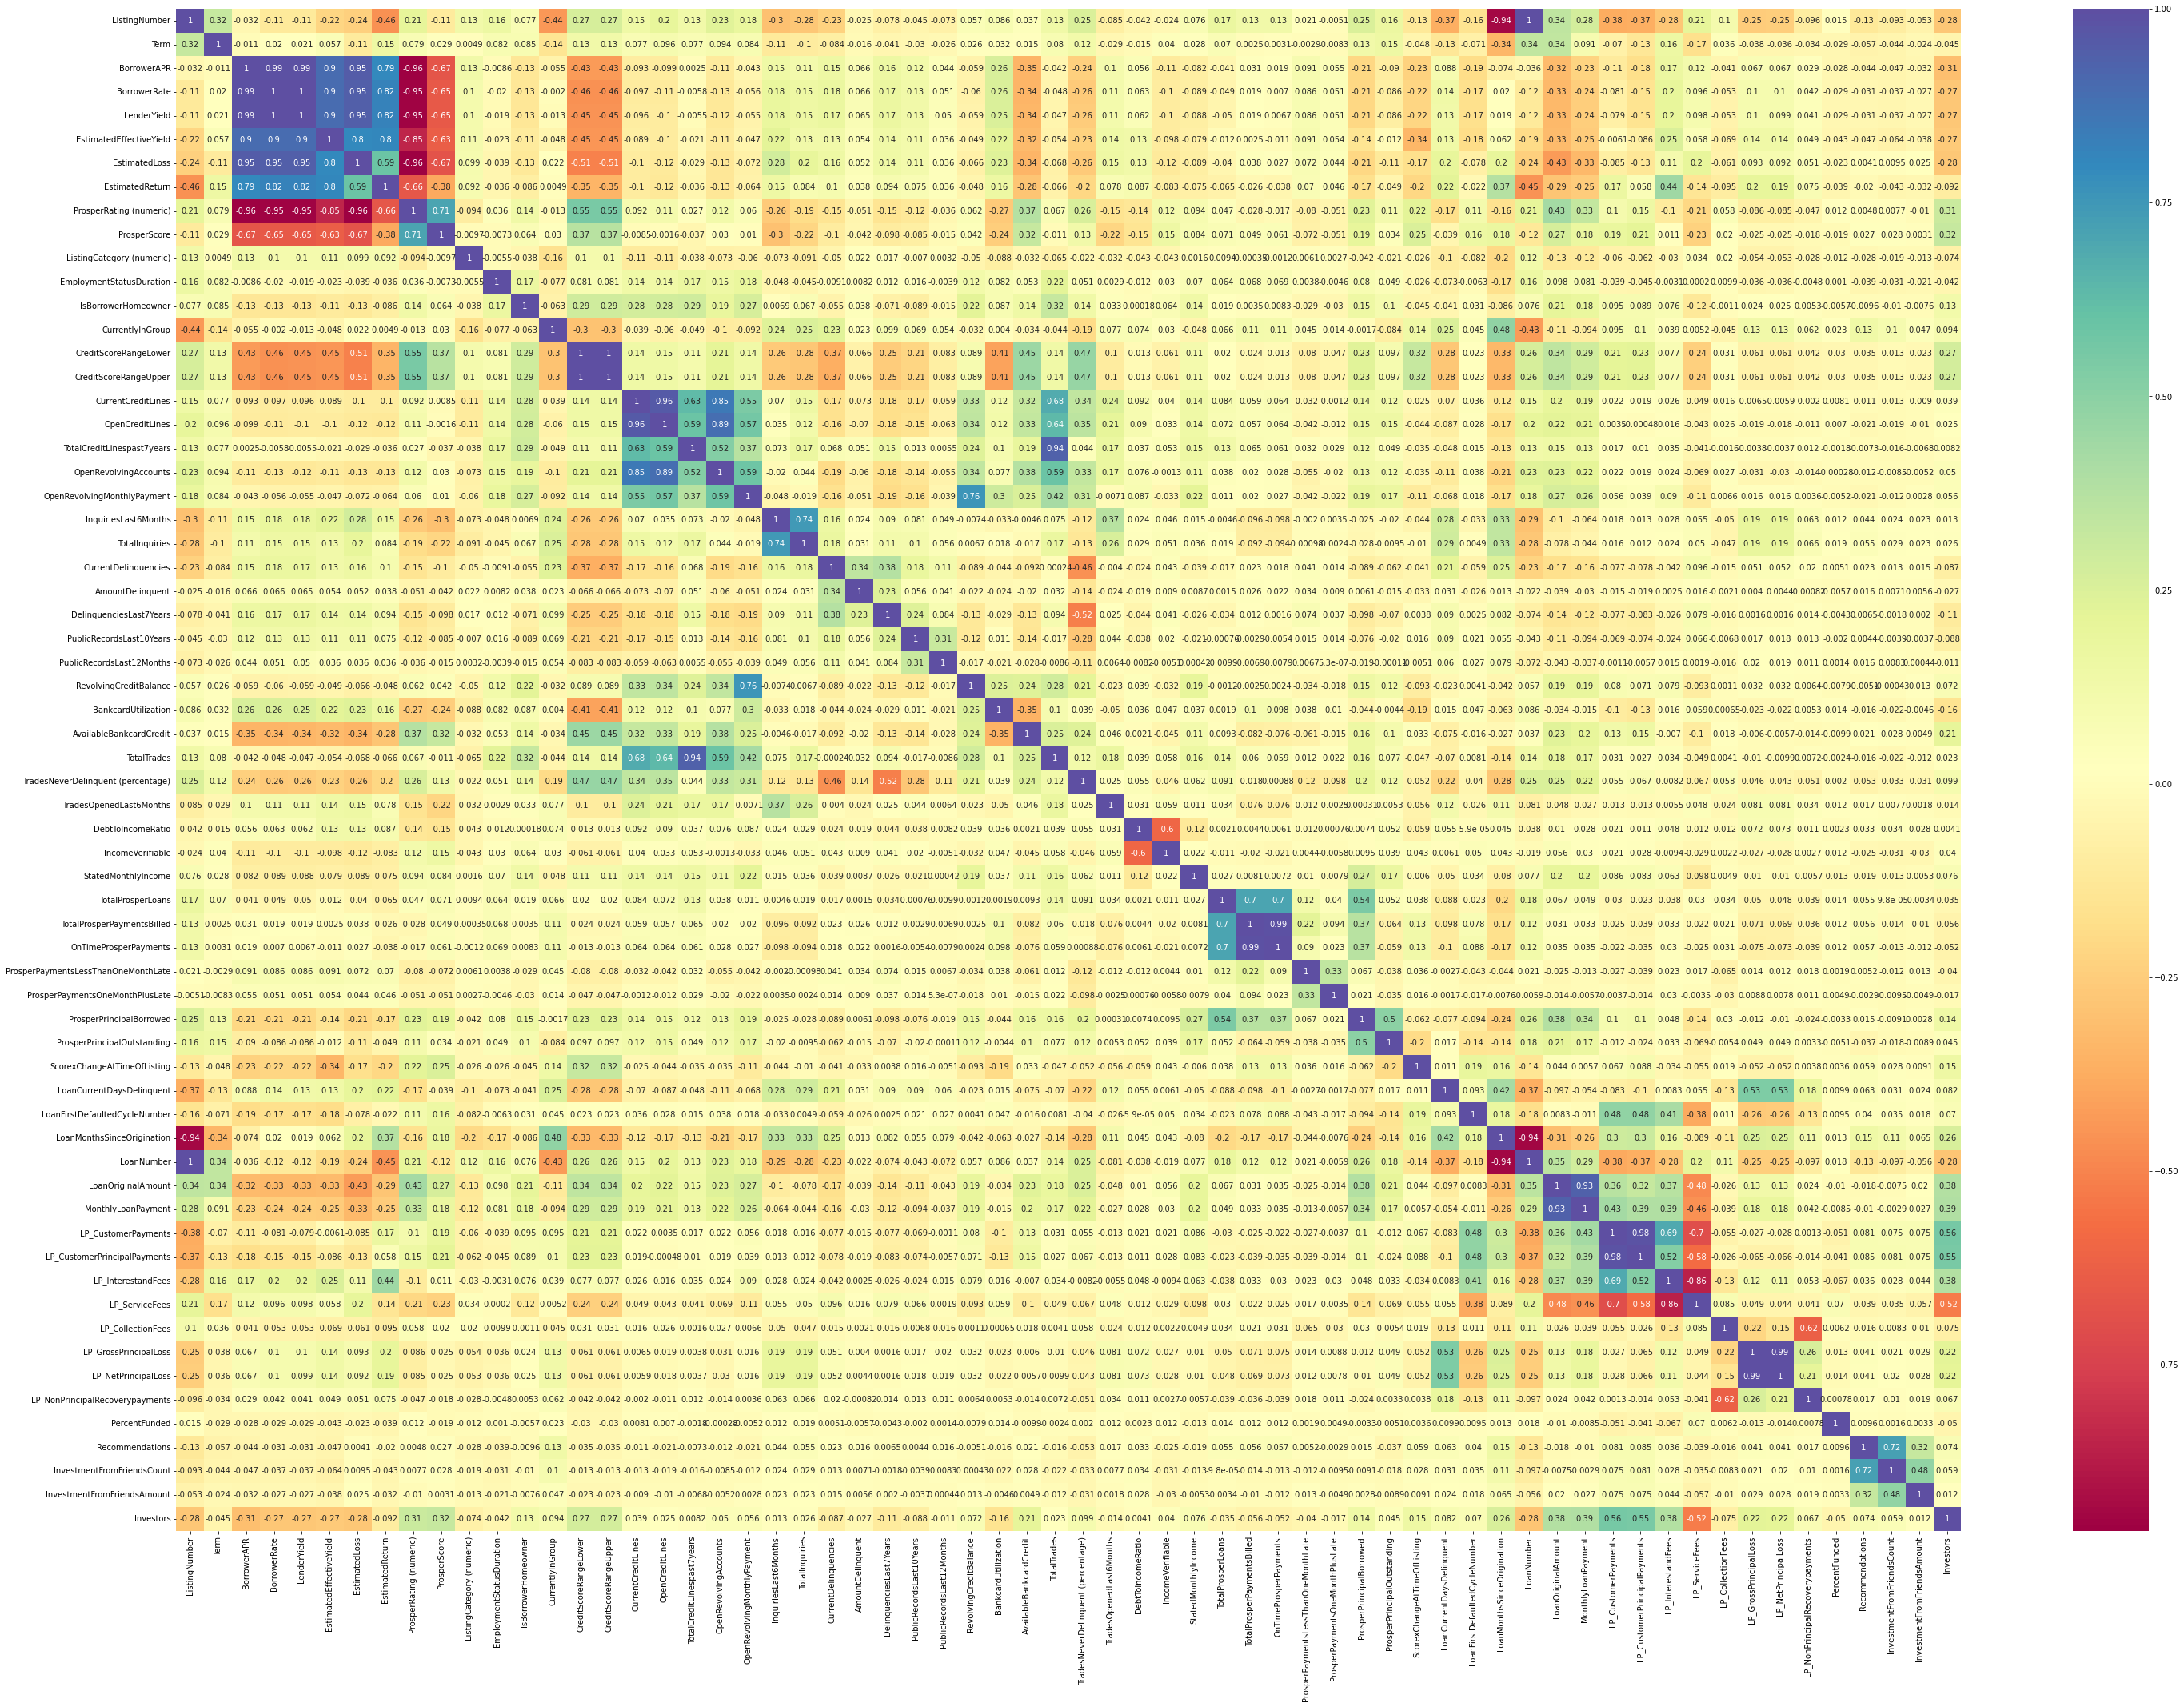

In [18]:
corr_metrics = data.corr()
plt.figure(figsize=(50,35))
color_palette = sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_metrics,cbar=True,annot=True,cmap=color_palette)
plt.show()

# **Data Cleaning**

In [19]:
#  removing any feature with more than 75% of missing values.
data_with_less_missing_values = data.dropna(thresh=data.shape[0] * 0.25, axis=1)
data_with_less_missing_values.shape

(113937, 71)

In [20]:
# removing loan samples with have more than 20% of missing values
data_with_less_missing_values = data_with_less_missing_values.dropna(thresh=data.shape[1] * 0.80, axis=0).reset_index(drop=True)
data_with_less_missing_values.shape

(103360, 71)

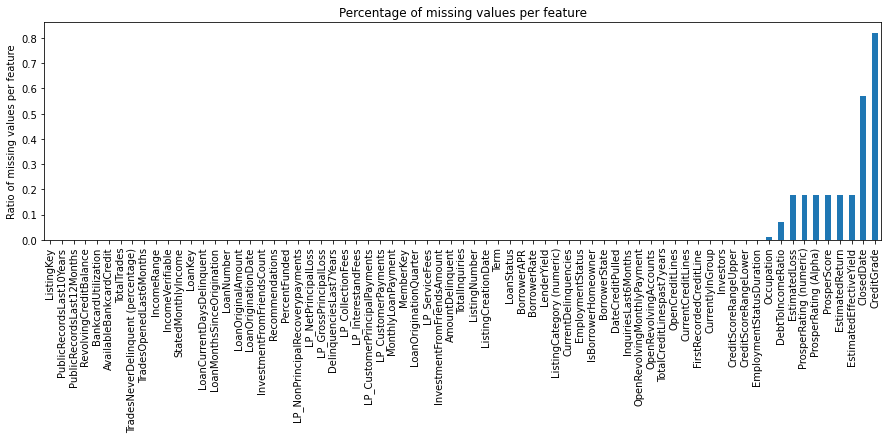

In [21]:
data_with_less_missing_values.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

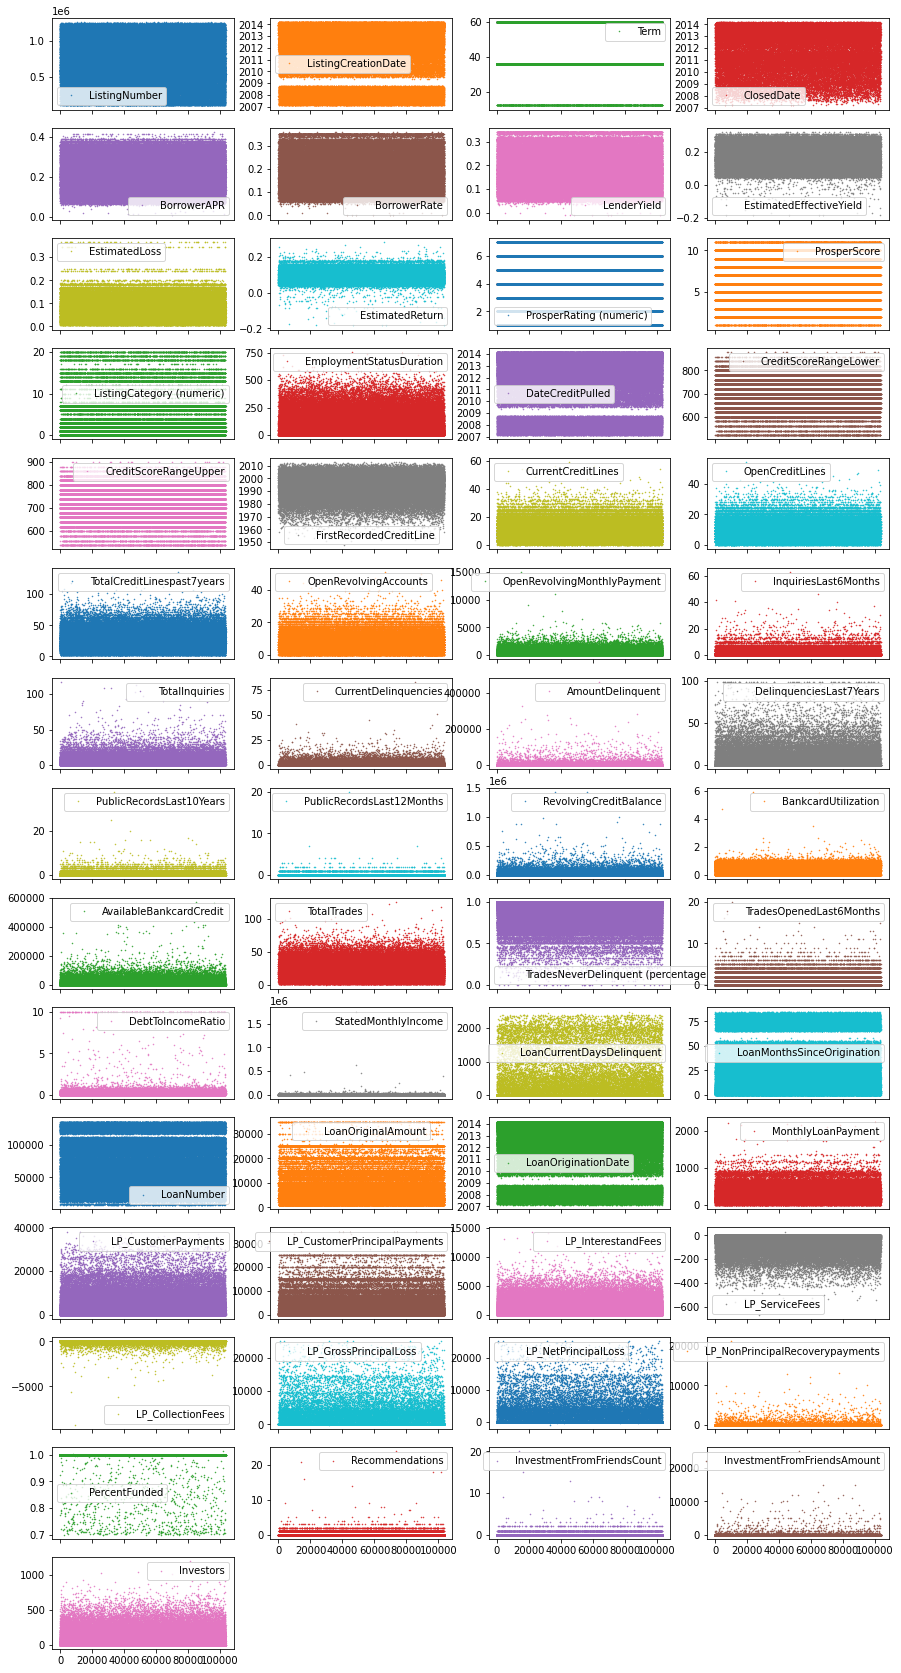

In [22]:
data_with_less_missing_values.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [23]:
cat_cols = [name for name in data_with_less_missing_values 
                        if data_with_less_missing_values[name].dtype in ["object", "bool" ]]
numerical_cols = [name for name in data_with_less_missing_values.columns
                      if data_with_less_missing_values[name].dtype in ['int64', 'float64', 'datetime64[ns]']]
cat_data = data_with_less_missing_values.drop(axis=1, columns=numerical_cols)
num_data = data_with_less_missing_values.drop(axis=1, columns=cat_cols)


**Non-Numerical features Cleaning**

Using Three Approaches:-
1) Drop Categorical Variables
2) Ordinal Encoding
3) Filling with most frequent value

In [24]:
data.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

<AxesSubplot:>

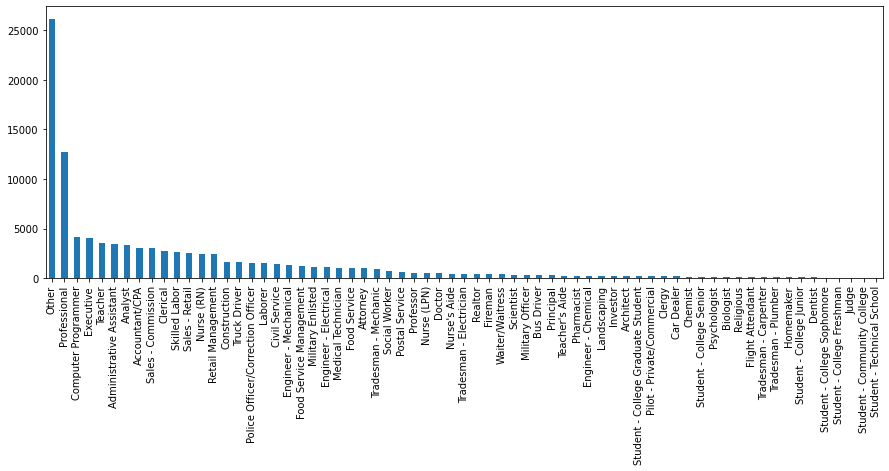

In [25]:
plt.figure(figsize=(15,5))
cat_data.Occupation.value_counts().plot(kind = 'bar')

In [26]:
# Filling missing values in Occupation column with the most frequent value in the column.
cat_data.Occupation = cat_data.Occupation.fillna(cat_data.Occupation.mode().iloc[0])

In [27]:
cat_data['ProsperRating (Alpha)'].value_counts(), data['ProsperRating (numeric)'].value_counts()
# Since all missing values in the Alpha column represents the value 0 in the numeric column
# and all other data are just the same we can get rid of the Alpha column

(C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64,
 4.0    18345
 5.0    15581
 6.0    14551
 3.0    14274
 2.0     9795
 1.0     6935
 7.0     5372
 Name: ProsperRating (numeric), dtype: int64)

In [28]:
cat_data = cat_data.drop(axis=1, columns=['ProsperRating (Alpha)'])

In [29]:
cat_data.CreditGrade.head(10)

0      C
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: CreditGrade, dtype: object

In [30]:
cat_data.shape

(103360, 13)

In [31]:
num_data.shape

(103360, 57)

In [32]:

# all missing values in the CreditGrade column represents the rating value 0
# fill in nan values with letter Z and then use OrdinalEncoder to convert it to numerical values
cat_data.CreditGrade = cat_data.CreditGrade.fillna("Z")
from sklearn.preprocessing import OrdinalEncoder
ratings = ['Z', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
encoder = OrdinalEncoder(categories = [ratings])
cat_data[['CreditGrade']] = encoder.fit_transform(cat_data[['CreditGrade']])
cat_data.CreditGrade = cat_data.CreditGrade.astype(int)

In [33]:
cat_data.isna().sum()

ListingKey                0
CreditGrade               0
LoanStatus                0
BorrowerState             0
Occupation                0
EmploymentStatus          0
IsBorrowerHomeowner       0
CurrentlyInGroup          0
IncomeRange               0
IncomeVerifiable          0
LoanKey                   0
LoanOriginationQuarter    0
MemberKey                 0
dtype: int64

In [34]:
num_data.isna().sum()

ListingNumber                             0
ListingCreationDate                       0
Term                                      0
ClosedDate                            58848
BorrowerAPR                               0
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield               18507
EstimatedLoss                         18507
EstimatedReturn                       18507
ProsperRating (numeric)               18507
ProsperScore                          18507
ListingCategory (numeric)                 0
EmploymentStatusDuration                 19
DateCreditPulled                          0
CreditScoreRangeLower                     0
CreditScoreRangeUpper                     0
FirstRecordedCreditLine                   0
CurrentCreditLines                        0
OpenCreditLines                           0
TotalCreditLinespast7years                0
OpenRevolvingAccounts                     0
OpenRevolvingMonthlyPayment     

**Numerical features**

In [35]:
num_data['DebtToIncomeRatio'].fillna(value=num_data['DebtToIncomeRatio'].mean(), inplace=True)

In [36]:
plt.figure(figsize=(45,10))
num_data.EmploymentStatusDuration = num_data.EmploymentStatusDuration.fillna(num_data.EmploymentStatusDuration.mode().iloc[0])

<Figure size 3240x720 with 0 Axes>

In [37]:
num_data.ClosedDate.fillna(value='Not Closed', inplace=True)

In [38]:
modified_data = num_data.join(cat_data)

In [39]:
#modified_data = modified_data.dropna( axis=0, how='any')

In [40]:
modified_data.shape

(103360, 70)

# Data Analysis
The critical part of Peer-to-Peer Lending is CreditGrade, BorrowerRate, Lender Yield, and the custom built risk assesment tool ProsperScore, which assess the creditworthiness of the borrower.

**Question 1 : What are the most number of borrowers Credit Grade?**

<AxesSubplot:xlabel='CreditGrade', ylabel='count'>

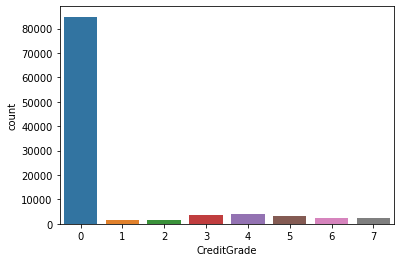

In [41]:
sns.countplot(x ='CreditGrade', data = modified_data)

In [42]:
modified_data.CreditGrade.value_counts(normalize=True) * 100

0    82.094621
4     3.887384
3     3.302051
5     3.009868
7     2.337461
6     2.287152
1     1.546053
2     1.535410
Name: CreditGrade, dtype: float64

82.1% of the loans has 0 or N/A credit grade. However, most of the other loans has a rating of C and D, which is very low.

**Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?**

Let's check Loan Status then!

<AxesSubplot:xlabel='count', ylabel='LoanStatus'>

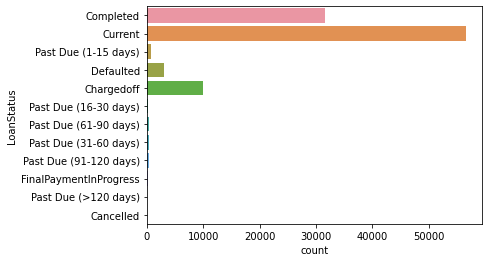

In [43]:
sns.countplot(y ='LoanStatus', data = modified_data)

As we can see from the grapgh above, not so many loans are past due.

**Question 3 : What is the highest number of BorrowerRate?**

<Figure size 720x288 with 0 Axes>

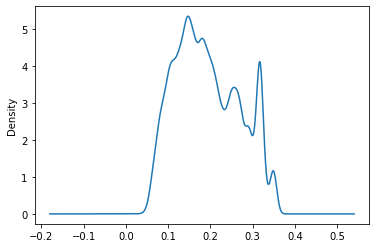

<Figure size 720x288 with 0 Axes>

In [44]:
modified_data.BorrowerRate.plot(kind = 'density')
plt.figure(figsize=(10,4))

 The highest number of Borrower Rate is between 0.1 and 0.2. 
 
**Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?**

<AxesSubplot:ylabel='Density'>

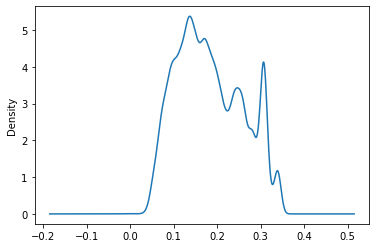

In [45]:
modified_data.LenderYield.plot(kind = 'density')


 The highest number of Lender Yield is also between 0.1 and 0.2
 
 **Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B**

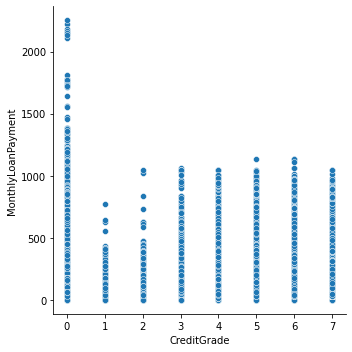

In [46]:
sns.relplot(data=modified_data, x="CreditGrade", y="MonthlyLoanPayment")

Yes, higher grades (7-AA or 6-A) have higher monthly loan payments. 

**Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.**

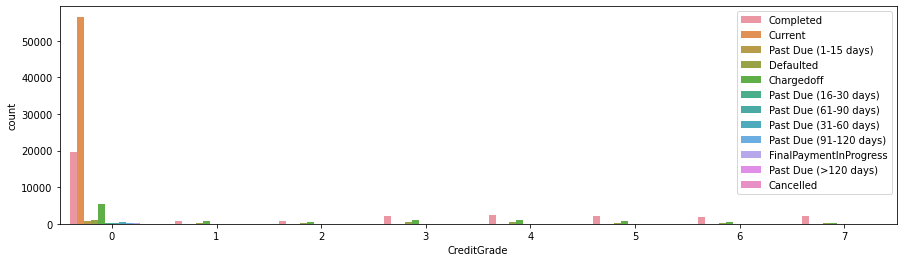

In [47]:
plt.figure(figsize=(15,4))
sns.countplot(x ='CreditGrade', data = modified_data, hue="LoanStatus")
plt.legend(loc='upper right')

We can see that the higher the Credit grade is the lower the defaulted rate. So, the CreditGrade looks accurate.

**Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?**

From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.

<AxesSubplot:xlabel='BorrowerAPR', ylabel='BorrowerRate'>

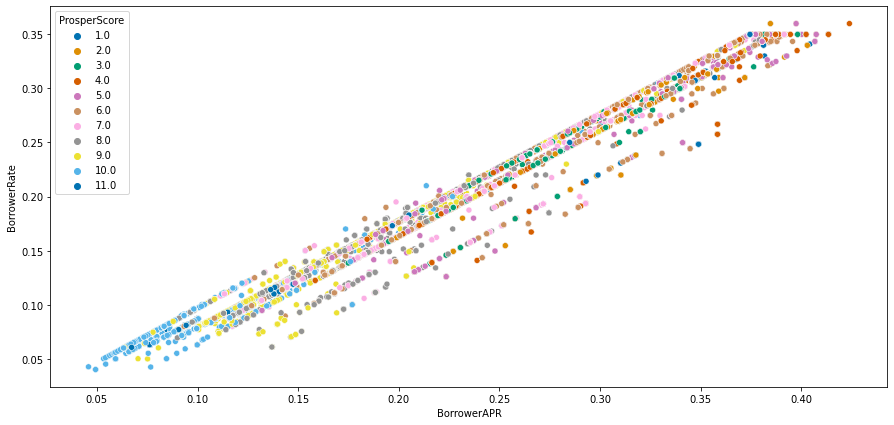

In [48]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=modified_data, x="BorrowerAPR", y="BorrowerRate", hue="ProsperScore", palette='colorblind', 
                   legend='full')

*Since the most important assest of a P2P lending Organization is its ability in using its tool to determine a borrower’s creditworthiness as accurate as possible. The organization would be more confident to market its organization as a great investment for investor to invest in hence leading to more borrower and higher market capitilization and boost revenue growth.*